<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-975bf9c6861f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
print(boston_df.head())
print(boston_df.info())
print(boston_df.describe())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 no

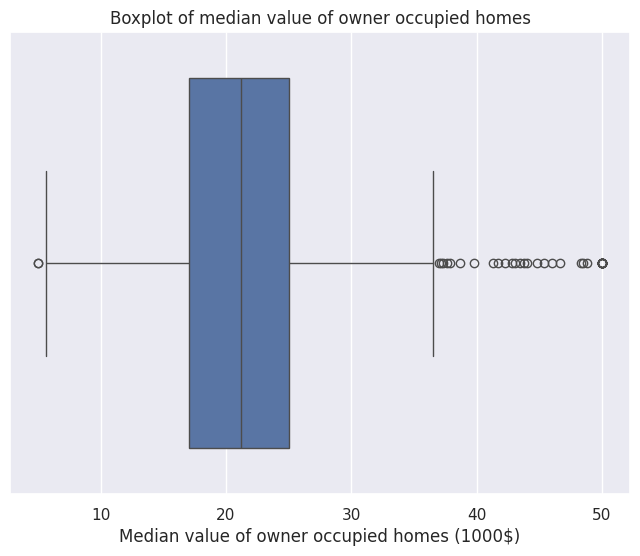

In [7]:
import numpy as np
sns.set(rc={'figure.figsize':(8,6)})
ax=sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of median value of owner occupied homes')
plt.xlabel('Median value of owner occupied homes (1000$)')
plt.show()

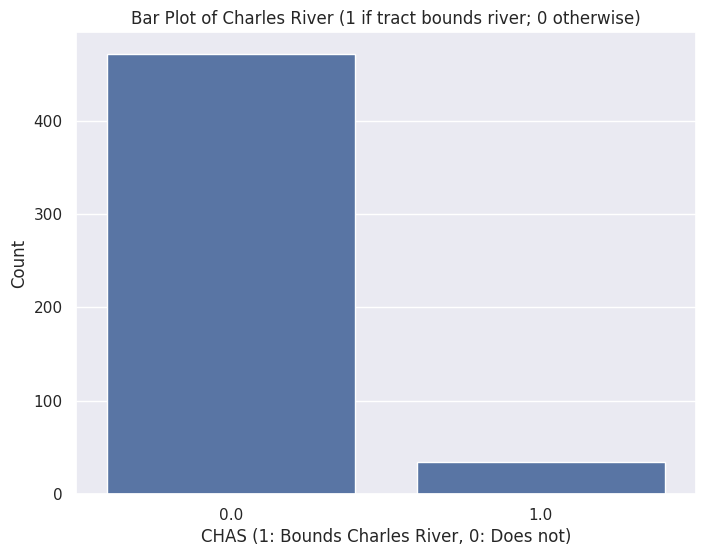

In [8]:
sns.set(rc={'figure.figsize':(8,6)})
ax=sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River (1 if tract bounds river; 0 otherwise)')
plt.xlabel('CHAS (1: Bounds Charles River, 0: Does not)')
plt.ylabel('Count')
plt.show()


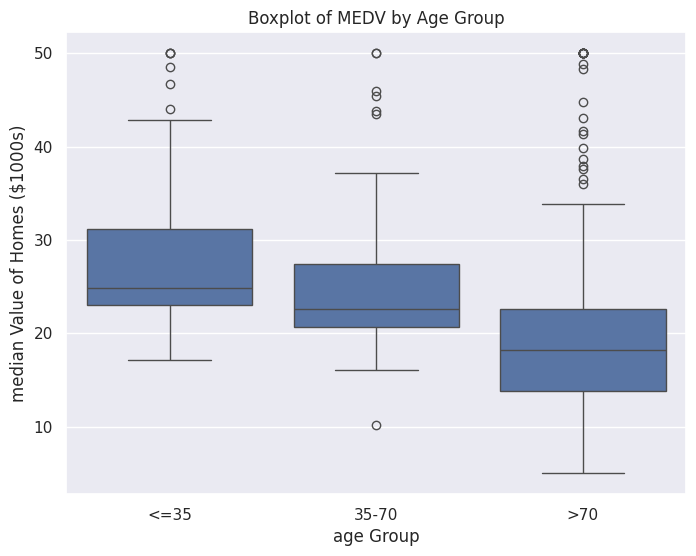

In [9]:
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by Age Group')
plt.xlabel('age Group')
plt.ylabel('median Value of Homes ($1000s)')
plt.show()

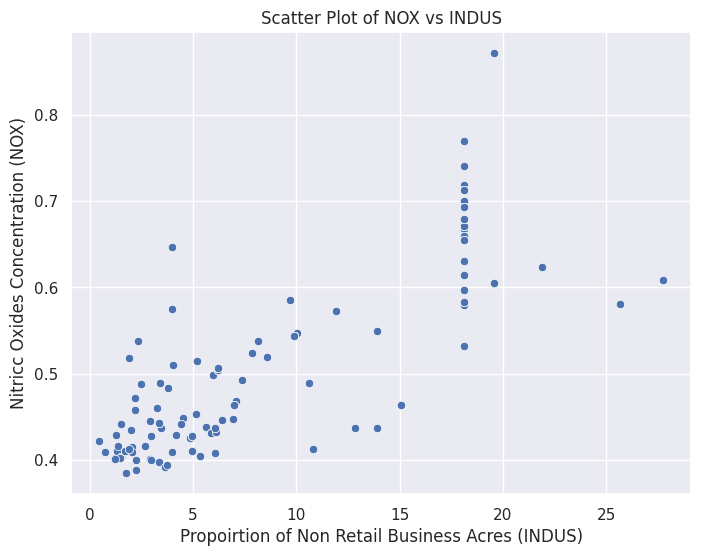

In [10]:
sns.set(rc={'figure.figsize':(8,6)})
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Propoirtion of Non Retail Business Acres (INDUS)')
plt.ylabel('Nitricc Oxides Concentration (NOX)')
plt.show()

In [ ]:
'''Positive Correlation is shown.As the proportion of non-retail business acres (INDUS) increases, concentration of nitric oxides (NOX) tends to be a high.'''

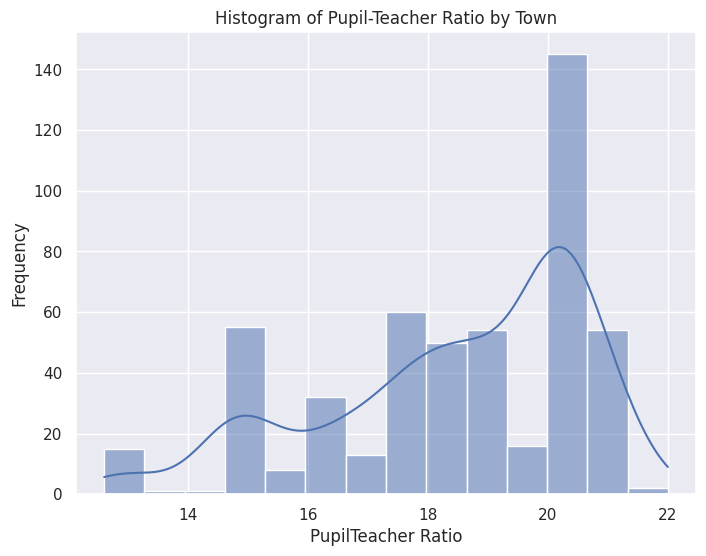

In [12]:
sns.set(rc={'figure.figsize':(8,6)})
sns.histplot(boston_df['PTRATIO'], kde=True)
plt.title('Histogram of Pupil-Teacher Ratio by Town')
plt.xlabel('PupilTeacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [14]:
from scipy.stats import ttest_ind
bound_by_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bound_by_river =boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = ttest_ind(bound_by_river, not_bound_by_river)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis.There is a significant difference in MEDV.")
else:
    print("Fail to reject the null hypothesis.No significant difference in MEDV.")

T-Statistic: 3.996437466090509, P-Value: 7.390623170519905e-05
Reject the null hypothesis.There is a significant difference in MEDV.


In [17]:
from scipy.stats import f_oneway
group1 =boston_df[boston_df['AGE_Group'] == '<=35']['MEDV']
group2 =boston_df[boston_df['AGE_Group'] == '35-70']['MEDV']
group3 =boston_df[boston_df['AGE_Group'] == '>70']['MEDV']
f_stat, p_value = f_oneway(group1, group2, group3)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis .There is a significamt difference in MEDV between age groups.")
else:
    print("Fail to reject the null hypothesis - No significant difference in MEDV between age groups.")

F-Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15
Reject the null hypothesis .There is a significamt difference in MEDV between age groups.


In [18]:
from scipy.stats import pearsonr
corr_coeff, p_value = pearsonr(boston_df['NOX'],boston_df['INDUS'])
print(f"Pearson correlation Coefficient: {corr_coeff},P-Value:{p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis.There is a correlation between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis.no correlation between NOX and INDUS.")

Pearson correlation Coefficient: 0.7636514469209192,P-Value:7.913361061210442e-98
Reject the null hypothesis.There is a correlation between NOX and INDUS.


In [ ]:
from sklearn.linear_model import LinearRegression
X = boston_df[['DIS']]  
y = boston_df['MEDV']   

reg = LinearRegression()
reg.fit(X, y)

# Output the regression coefficients
print(f"Intercept: {reg.intercept_}, Coefficient for DIS: {reg.coef_[0]}")

# Interpretation
print("For each additional weighted distance to employment centers, the median value of homes changes by:", reg.coef_[0])